In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
movies = pd.read_csv("P4-Movie-Ratings.csv")
movies.columns = ["Film","Genre","RottenTomatoesRating","AudienceRating","BudgetMillions","ReleaseYear"]
movies.head()

,Film,Genre,RottenTomatoesRating,AudienceRating,BudgetMillions,ReleaseYear
0,(500) Days of Summer,Comedy,87,81,8,2009
1,"10,000 B.C.",Adventure,9,44,105,2008
2,12 Rounds,Action,30,52,20,2009
3,127 Hours,Adventure,93,84,18,2010
4,17 Again,Comedy,55,70,20,2009


In [3]:
movies.Film = movies.Film.astype("category")
movies.Genre = movies.Genre.astype("category")
movies.ReleaseYear = movies.ReleaseYear.astype("category")
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Film                  559 non-null    category
 1   Genre                 559 non-null    category
 2   RottenTomatoesRating  559 non-null    int64   
 3   AudienceRating        559 non-null    int64   
 4   BudgetMillions        559 non-null    int64   
 5   ReleaseYear           559 non-null    category
dtypes: category(3), int64(3)
memory usage: 36.5 KB


In [4]:
def hue_regplot(data, x, y, hue, palette=None, **kwargs):
    from matplotlib.cm import get_cmap
    
    regplots = []
    
    levels = data[hue].unique()
    
    if palette is None:
        default_colors = get_cmap('tab10')
        palette = {k: default_colors(i) for i, k in enumerate(levels)}
    
    for key in levels:
        regplots.append(
            sns.regplot(
                x=x,
                y=y,
                data=data[data[hue] == key],
                color=palette[key],
                **kwargs
            )
        )
    
    return regplots
#------------
cat_list=[]
gen_list=[]
for i in movies.Genre.cat.categories:
    cat_list.append(movies[movies.Genre==i].BudgetMillions)
    gen_list.append(i)

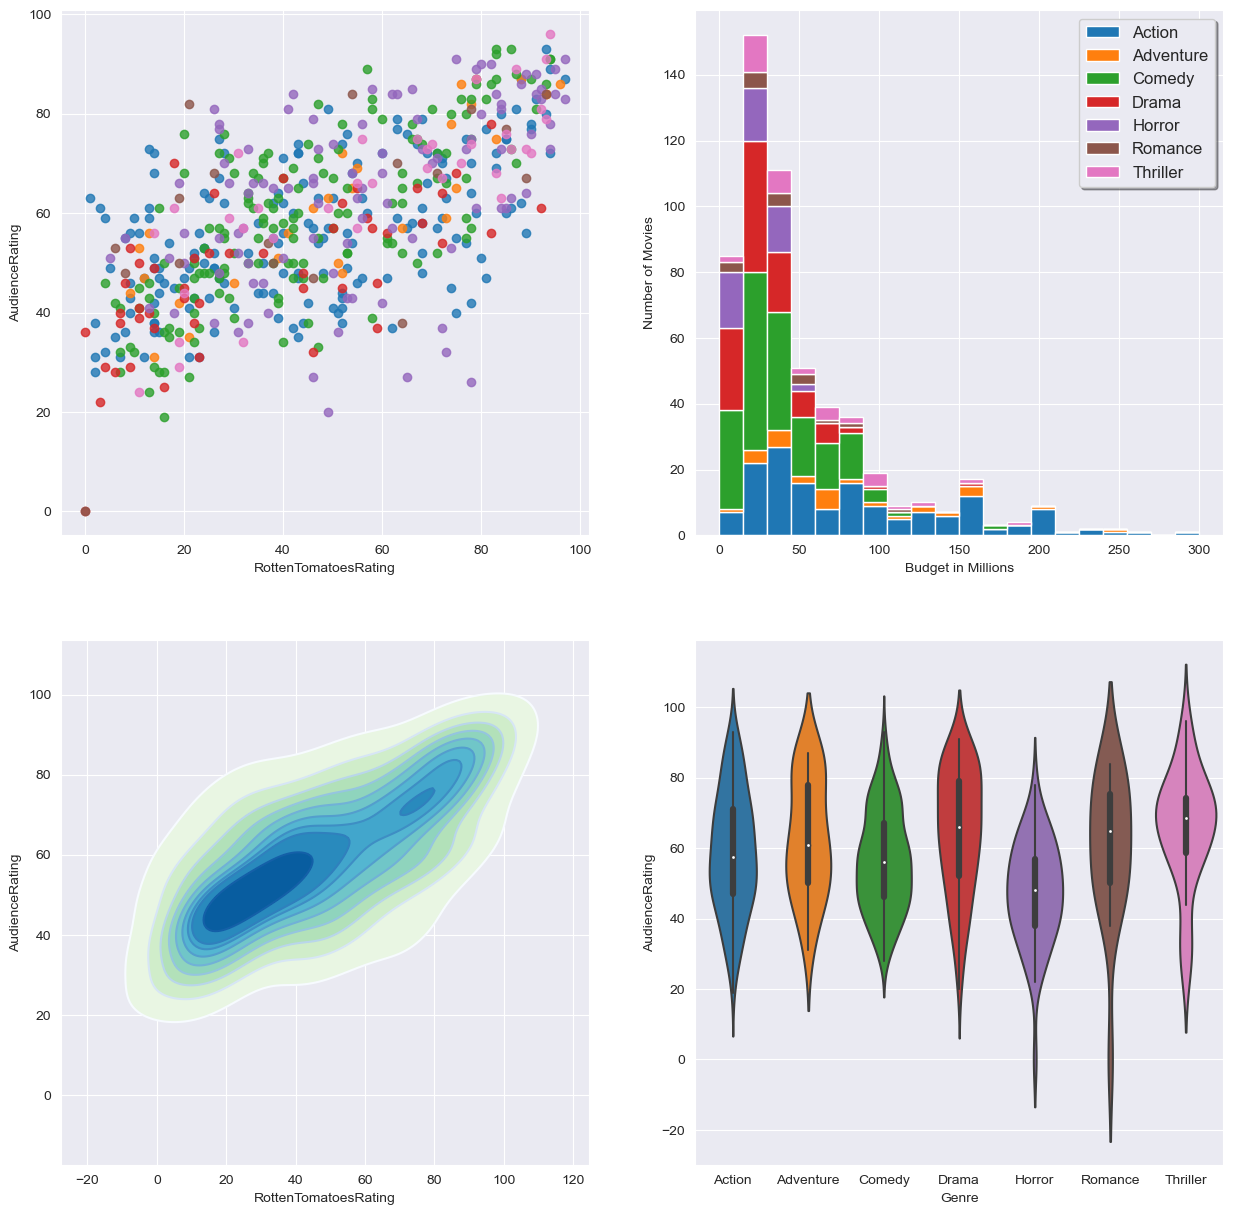

In [36]:
sns.set_style('darkgrid')
f , axes = plt.subplots(2,2,figsize=(15,15))

lm1 = hue_regplot(data=movies,x="RottenTomatoesRating",y="AudienceRating",fit_reg=False,hue="Genre",ax=axes[0,0])

axes[0,1].hist(cat_list,bins=20,stacked=True,rwidth=1,label=gen_list)
axes[0,1].legend(frameon=True,shadow=True,framealpha=1,prop={'size':12})
axes[0,1].set_xlabel("Budget in Millions")
axes[0,1].set_ylabel("Number of Movies")

kde1 = sns.kdeplot(x=movies.RottenTomatoesRating,y=movies.AudienceRating, shade=True,cmap='GnBu',ax=axes[1,0])
kde2 = sns.kdeplot(x=movies.RottenTomatoesRating,y=movies.AudienceRating,cmap='Blues',ax=axes[1,0])

v1  =sns.violinplot(data=movies,x="Genre",y="AudienceRating",ax=axes[1,1])

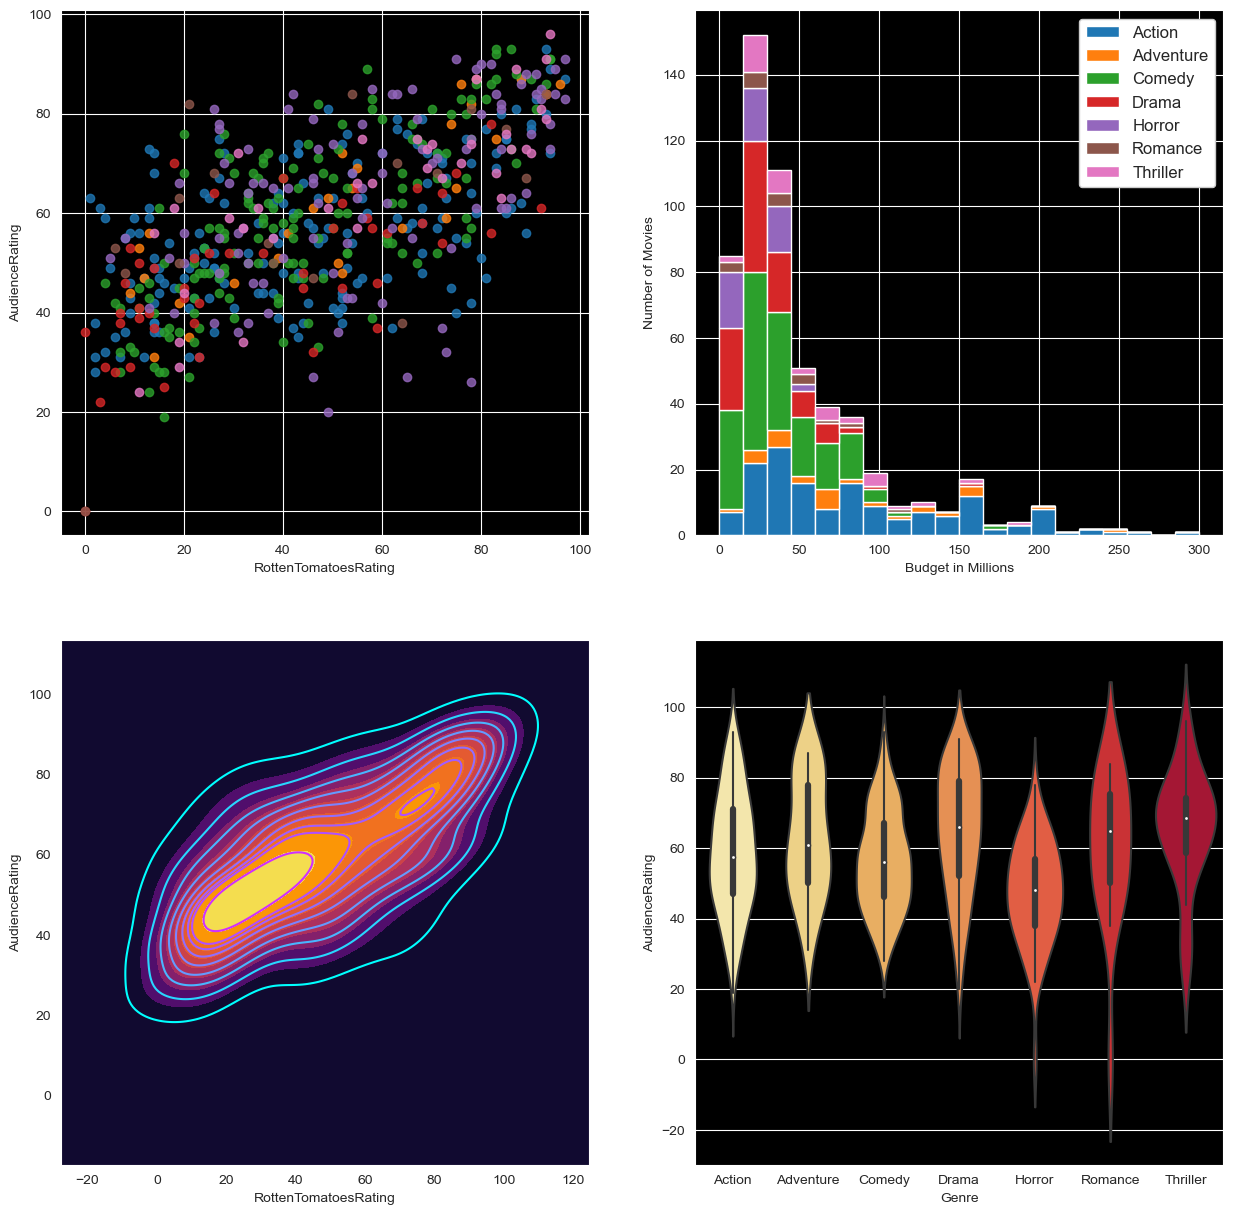

In [34]:
sns.set_style('darkgrid', {"axes.facecolor":"black"})
f , axes = plt.subplots(2,2,figsize=(15,15))

lm1 = hue_regplot(data=movies,x="RottenTomatoesRating",y="AudienceRating",fit_reg=False,hue="Genre",ax=axes[0,0])

sns.set_style('white')
axes[0,1].hist(cat_list,bins=20,stacked=True,rwidth=1,label=gen_list)
axes[0,1].legend(frameon=True,framealpha=1,prop={'size':12})
axes[0,1].set_xlabel("Budget in Millions")
axes[0,1].set_ylabel("Number of Movies")

kde1 = sns.kdeplot(x=movies.RottenTomatoesRating,y=movies.AudienceRating, shade=True,thresh=0,cmap='inferno',ax=axes[1,0])
kde2 = sns.kdeplot(x=movies.RottenTomatoesRating,y=movies.AudienceRating,cmap='cool',ax=axes[1,0])

v1  =sns.violinplot(data=movies,x="Genre",y="AudienceRating",ax=axes[1,1],palette="YlOrRd")